In [1]:
%matplotlib inline  

import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import innvestigate
import innvestigate.utils as iutils
import innvestigate.utils.visualizations as ivis

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [53]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr, clim=None):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    axes[0].imshow(images_arr[0][:,:,0], cmap='gray')
    axes[0].axis('off')
    axes[1].imshow(images_arr[1][:,:,0], cmap='seismic', clim=clim)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

### Load pretrained model

In [3]:
model = load_model('../models/brats_model_5.h5')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_a (Conv2D)              (None, 240, 240, 16)      160       
_________________________________________________________________
max_a (MaxPooling2D)         (None, 120, 120, 16)      0         
_________________________________________________________________
drop_a (Dropout)             (None, 120, 120, 16)      0         
_________________________________________________________________
conv_b (Conv2D)              (None, 120, 120, 32)      4640      
_________________________________________________________________
max_b (MaxPooling2D)         (None, 60, 60, 32)        0         
_________________________________________________________________
conv_c (Conv2D)              (None, 60, 60, 64)        18496     
_________________________________________________________________
max_c (MaxPooling2D)         (None, 30, 30, 64)        0         
__________

### Load data

In [25]:
train_dir = '../data/train/t2'
batch_size = 256
IMG_HEIGHT = 240
IMG_WIDTH = 240
generator = ImageDataGenerator(rescale=1./255)
data_gen = generator.flow_from_directory(batch_size=batch_size,
                                       directory=train_dir,
                                       shuffle=True,
                                       color_mode="grayscale",
                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                       class_mode='binary')

Found 13440 images belonging to 2 classes.


In [26]:
x_train, l = next(data_gen)

### Interpretation methods

In [27]:
model_wo_softmax = iutils.keras.graph.model_wo_softmax(model)

In [37]:
image = x_train[11:12]

In [36]:
l

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1.

#### Gradient

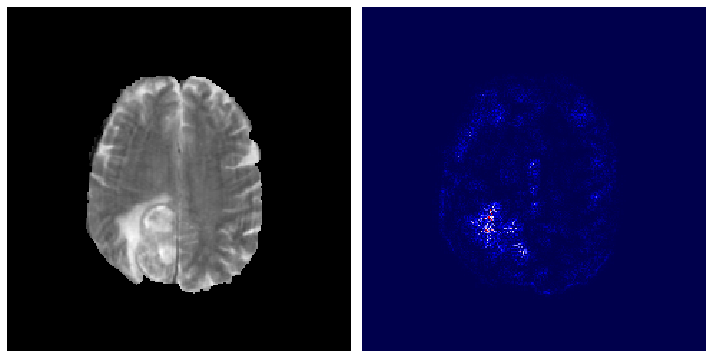

In [54]:
analyzer = innvestigate.create_analyzer("gradient", model_wo_softmax, **{"postprocess": "abs"})
img = analyzer.analyze(image)
img = iutils.postprocess_images(img)
plotImages([image[0], img[0]])

#### DeepTaylor

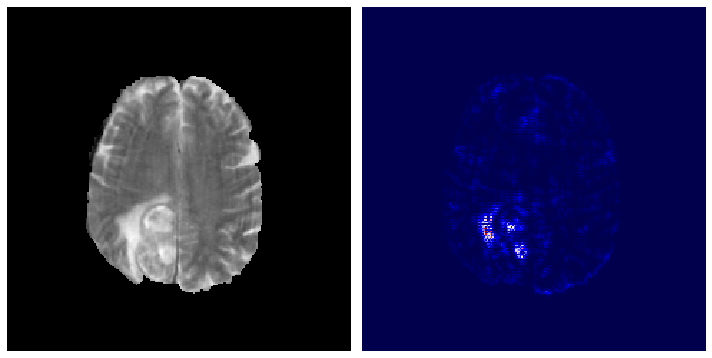

In [55]:
analyzer = innvestigate.create_analyzer("deep_taylor.bounded", model_wo_softmax, **{"low": 0,"high": 1})
img = analyzer.analyze(image)
img = iutils.postprocess_images(img)
plotImages([image[0], img[0]])

#### LRP-Z

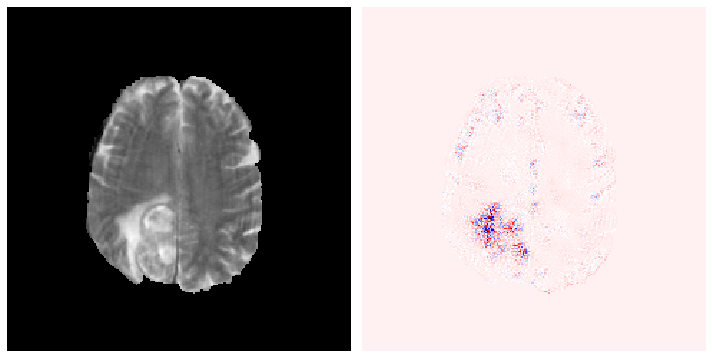

In [56]:
analyzer = innvestigate.create_analyzer("lrp.z", model_wo_softmax, **{})
img = analyzer.analyze(image)
img = iutils.postprocess_images(img)
plotImages([image[0], img[0]])

#### LRP-Epsilon

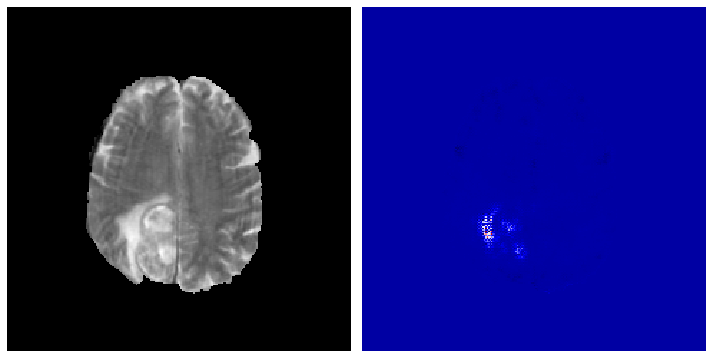

In [60]:
analyzer = innvestigate.create_analyzer("lrp.epsilon", model_wo_softmax, **{"epsilon": 1})
img = analyzer.analyze(image)
img = iutils.postprocess_images(img)
plotImages([image[0], img[0]])